# Aufgabe: Lineare Methoden

0. Importieren Sie alle die nötigen Bibliotheken.

In [1]:
from typing import Any

from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from matplotlib import cm

### Aufgabe 1. Lineare Regression per Hand
Implementieren Sie die Lineare Regression per Hand. Versuchen Sie händisch so eine Kombination von w (Gewicht) und b (Bias) zu finden, dass der Fehler (MSE/SSE/RMSE) minimal wird. Visualisieren Sie das modell für unterschiedliche w’s und b’s. Nutzen Sie dafür folgende Daten:

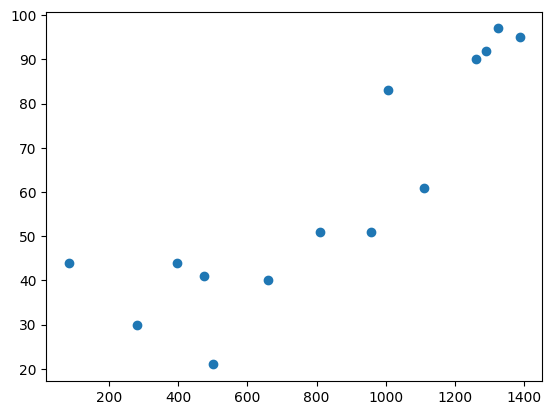

In [2]:
# Vorgegebene Daten aus der Aufgabe
studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

# Darstellung der Datenverteilung über einen Scatterplot
plt.scatter(studying, result)

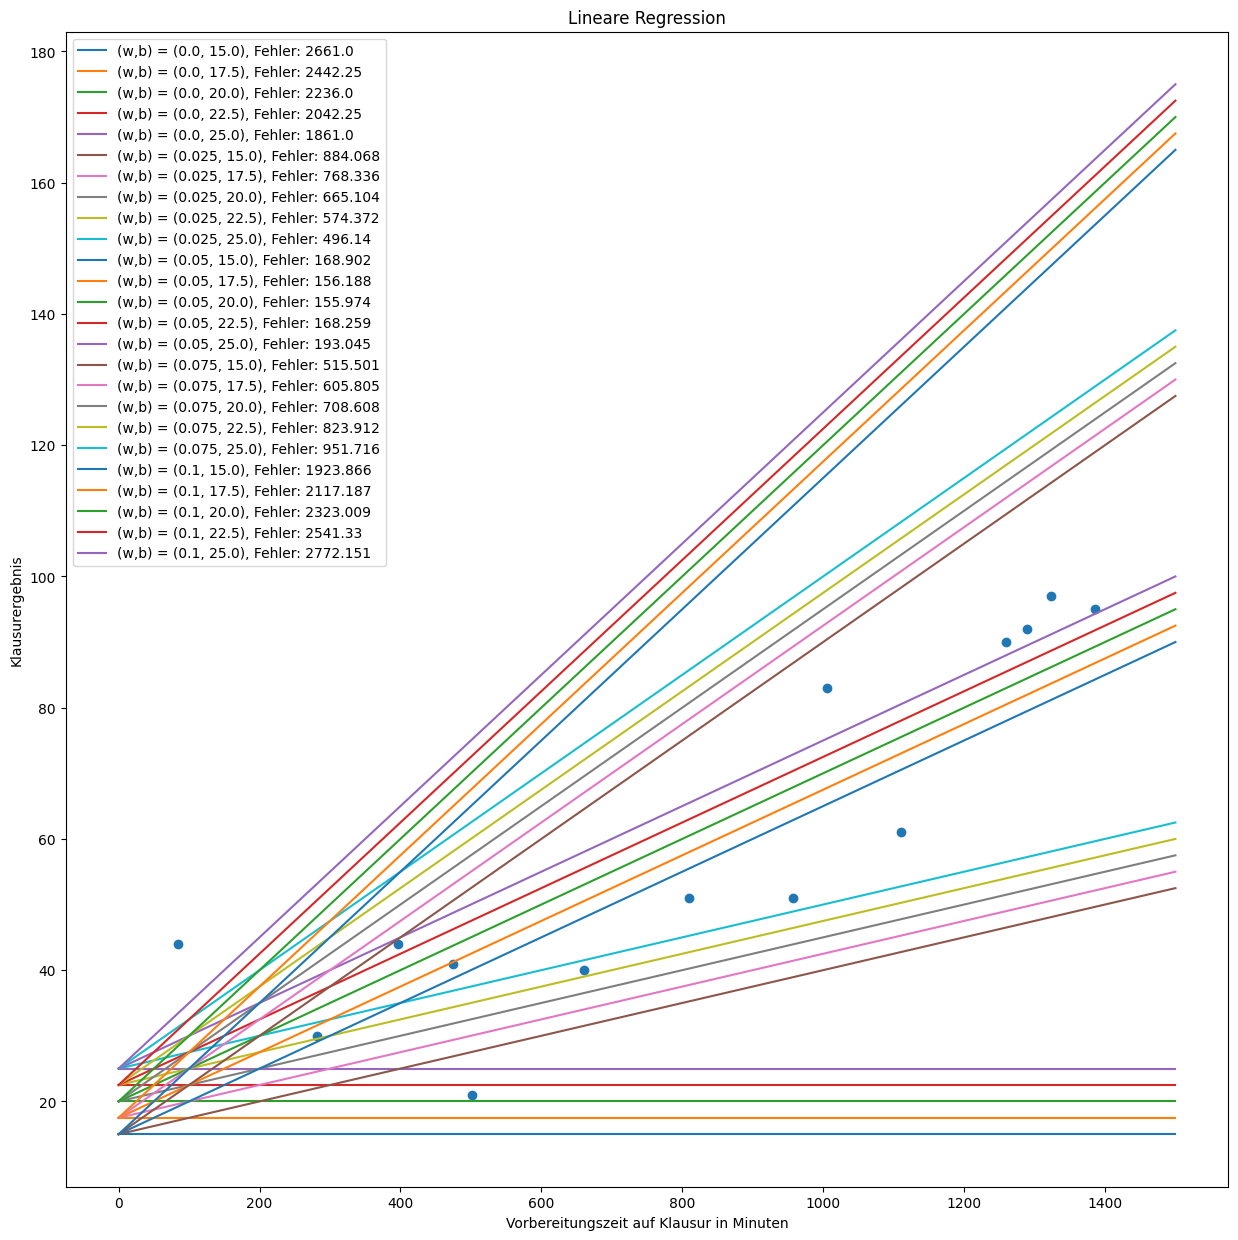

In [3]:
# Definieren der Vektoren für Gewicht und Bias
# Die folgende Funktion definiert jeweils 5 Werte in dem vorher angegebenen Wertebereich
ws = np.linspace(0, 0.1, 5)
bs = np.linspace(15,25, 5)

# Definiere ein Array aus den Kombinationen der Gewichte und Biases
# Doppelte List comprehension statt zwei aufeinanderfolgende For-Loops
combinations = np.array([[w, b] for w in ws for b in bs])

# Definiere den Wertebereich der X-Achse um die Regressionslinie später darüber zu plotten
x_axis = np.linspace(0, 1500)

# Gerüst für den Plot mit Beschriftungen und Scatterplot der originalen Werte
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.scatter(studying, result)
ax.set_title("Lineare Regression")
ax.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax.set_ylabel("Klausurergebnis")

# Gehe durch alle möglichen Kombinationen
for wb in combinations:
    w, b = wb[0], wb[1]

    # Berechne die Ergebnisse für die Kombination aus Gewicht und Bias
    prediction = w * studying + b

    # Berechne den Fehler aus der Vorhersage und dem wahren Ergebnis
    error = mse(prediction, result)

    # Plotte die Regressionsgerade über den Wertebereich der X-Achse
    ax.plot(x_axis, w * x_axis + b, label="(w,b) = ({}, {}), Fehler: {}".format(round(w,3),b, round(error,3)))

# Plotten der Legende
ax.legend()

### Aufgabe 2. Polynomiale Regression

1. Implementieren Sie ein Polynomiales Modell für Regression für den Polynomgrad 1 bis 7. Trainieren Sie dafür sklearn Modelle, die für den studying Vektor die Prädiktion von result zurückliefert (die Daten aus der Aufgabe 1). Vergleichen Sie den Fehler für unterschiedliche Polynomgrade. Visualisieren Sie die Modelle. 

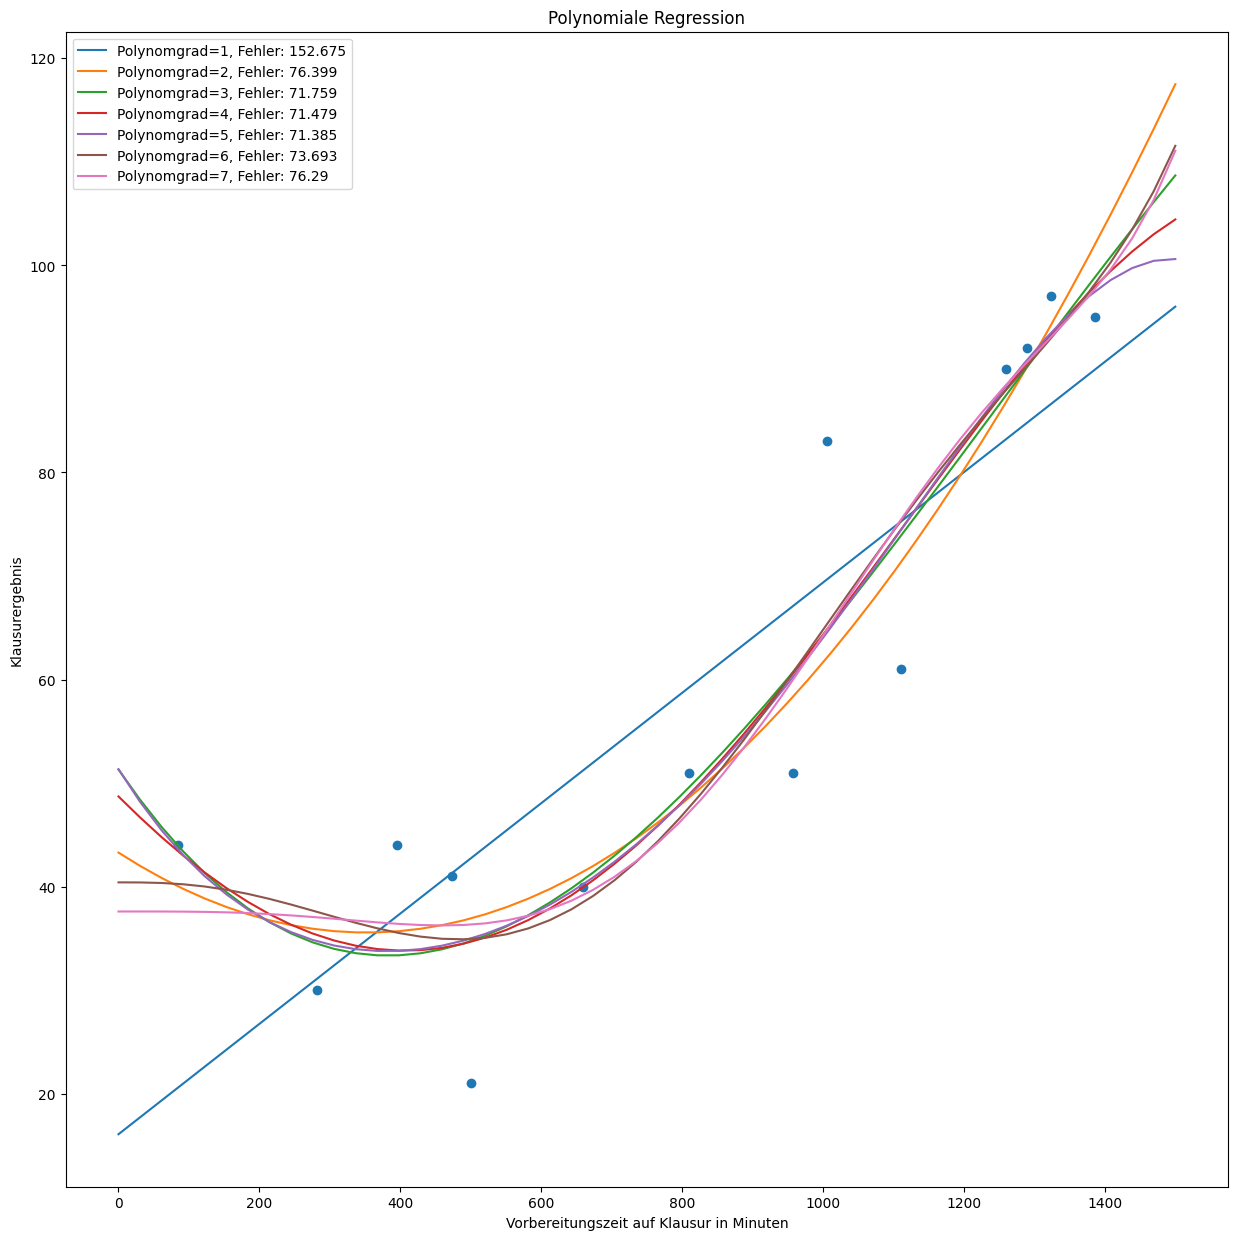

In [ ]:
# Gerüst für die Darstellung
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.scatter(studying, result)
ax.set_title("Polynomiale Regression")
ax.set_xlabel("Vorbereitungszeit auf Klausur in Minuten")
ax.set_ylabel("Klausurergebnis")

# Gehe durch die Polynomgrade 1 bis 7 (Letzter Wert in range wird nicht erreicht)
for i in range(1, 8):
    # Definiere den Grad des Polynoms
    poly = PolynomialFeatures(i)

    # Transforme die x-Werte durch Hinzufügen der polynomialen Features
    # Die Reshape Funktion bringt die Daten in das richtige Format
    x_poly = poly.fit_transform(studying.reshape(-1, 1))

    # Erstelle ein lineares Modell mit den polynomialen Features
    model = LinearRegression()
    model.fit(x_poly, result)

    # Erstelle eine Vorhersage und berechne den Fehler
    prediction = model.predict(x_poly)
    error = mse(prediction, result)

    # Erstelle Vorhersage für den gesamten Wertebereich
    # Die Eingabewerte müssen mit demselben Objekt der Polynomialen Features transformiert werden
    predicted_plot = model.predict(poly.transform(x_axis.reshape(-1, 1)))

    # Plotten der Regressionsfunktionen mit Label und Fehler
    ax.plot(
        x_axis,
        predicted_plot,
        label="Polynomgrad={}, Fehler: {}".format(i, round(error, 3)),
    )

ax.legend()


2. Binarisieren Sie nun den Result Vektor für die Logistische Regression nach Bestanden (>= 50) und Nicht Bestanden (< 50) und implementieren Sie vergleichbar zu der Aufgabe 2 eine Logistische Regression für Klassifikation. 

Genauigkeit für Polynomgrad 1: 100.0 Prozent.
[[4.58620555e-13 7.08458817e-02]]
Genauigkeit für Polynomgrad 2: 100.0 Prozent.
[[-8.87522429e-05 -6.21653417e-02  1.12869031e-04]]
Genauigkeit für Polynomgrad 3: 100.0 Prozent.
[[-3.57653140e-07 -2.99688228e-05 -2.34048633e-03  2.93013702e-06]]
Genauigkeit für Polynomgrad 4: 100.0 Prozent.
[[-7.00321679e-11 -5.88022983e-09 -4.90143355e-07 -3.75242023e-05
   4.63942795e-08]]
Genauigkeit für Polynomgrad 5: 100.0 Prozent.
[[-1.22632433e-14 -1.03007472e-12 -8.64591788e-11 -7.19761876e-09
  -5.48857222e-07  6.77715221e-10]]
Genauigkeit für Polynomgrad 6: 100.0 Prozent.
[[-2.03400445e-18 -1.70856218e-16 -1.43509065e-14 -1.20440086e-12
  -1.00226754e-10 -7.63466479e-09  9.42581430e-12]]


/Users/lauraboenchen/Workspace/Digethic/full-stack-machine-learning/.venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/lauraboenchen/Workspace/Digethic/full-stack-machine-learning/.venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Users/lauraboenchen/Workspace/Digethic/full-stack-machine-learning/.venv/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Users/lauraboenchen/Workspace/Digethic/full-stack-machine-learning/.venv/lib/python3.10/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


Genauigkeit für Polynomgrad 7: 100.0 Prozent.
[[-3.37793181e-22 -2.83746143e-20 -2.38344727e-18 -2.00190300e-16
  -1.67995812e-14 -1.39765147e-12 -1.06392272e-10  1.31350830e-13]]


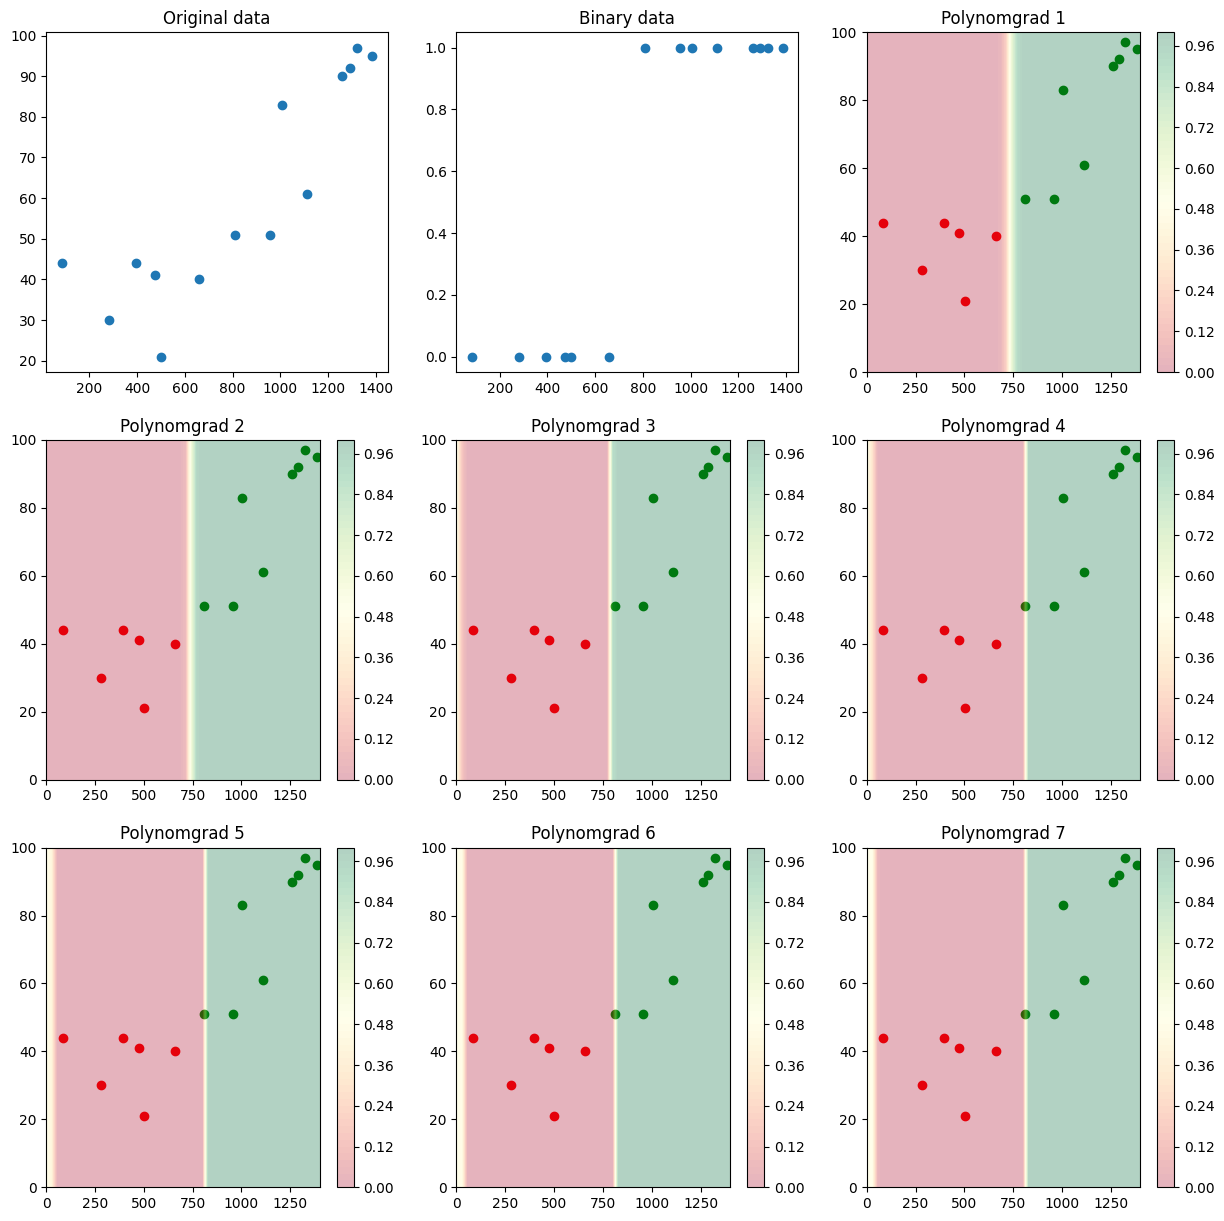

In [ ]:
# Definiere eine Funktion, da die Originalen Daten mehrmals dargetellt werden sollen
# Hier sehen sie Typing in einer Funktion, was in Python nicht gemacht werden muss,
# aber es führt zu organisierterem Code in dem linting besser angewendet werden kann
def plot_original_data(ax: Any, x: np.array, y: np.array):
    """Plot original data. Based on their values they will be coloured and labelled differently.

    Args:
        ax (Any): axis of the subplot.
        x (np.array): feature array.
        y (np.array): target array.
    """
    ax.scatter(
        x[np.argwhere(y >= 50)].ravel(),
        y[np.argwhere(y >= 50)].ravel(),
        c="green",
        label="Bestanden",
    )
    ax.scatter(
        x[np.argwhere(y < 50)].ravel(),
        y[np.argwhere(y < 50)].ravel(),
        c="red",
        label="Nicht bestanden",
    )

# Binarisieren des Ergebnisse. Alles über 50 ist bestanden, also 1.
result_binary = np.array([1 if i >= 50 else 0 for i in result])


fig = plt.figure(figsize=(15,15))

# Definiere ein 3x3 Grid für die Plots, im ersten werden die originalen Daten dargestellt
ax = fig.add_subplot(3, 3, 1)
ax.set_title("Original data")
ax.scatter(studying, result)

# Im zweiten Plot die binarisierten Daten
ax = fig.add_subplot(3, 3, 2)
ax.set_title("Binary data")
ax.scatter(studying, result_binary)

# Gehe wieder durch alle Polynomgrade
for i in range(1, 8):

    # Darstellung der Originaldaten in jedem Subplot
    # Die Subplots starten ab dem dritten, da die anderen beiden schon belegt sind
    ax = fig.add_subplot(3, 3, i+2)
    ax.set_title("Polynomgrad {}".format(i))
    plot_original_data(ax, studying, result)

    # Fitten der Polynomialen Features wie bei der polynomialen linearen Regression
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(studying.reshape(-1, 1))

    # Erstellen und Trainieren des Modells
    model = LogisticRegression(solver='newton-cg', max_iter=1000)
    model.fit(x_poly, result_binary)

    # Erstellen der Vorhersage mit Vorhersagewahrscheinlichkeit
    predicted = model.predict_proba(poly.transform(studying.reshape(-1, 1)))

    # Berechnung der Accuracy anhand der Vorhersage und dem wahren Ergebnis
    score = model.score(x_poly, result_binary)
    print("Genauigkeit für Polynomgrad {}: {} Prozent.".format(i,score*100))

    # X- und Y-Achsen definieren und darüber die gesamte 2-D Fläche
    x_axis, y_axis = np.linspace(0, 1400), np.linspace(0, 100)
    x1, x2 = np.meshgrid(x_axis, y_axis)

    # Berechne die Ergebnisse für den gesamten Wertebereich
    z = np.array([model.predict_proba(poly.transform(x_axis.reshape(-1, 1))).T[1] for y in y_axis])

    # Darstellung der Ergebnise anhand einer Contourmap mit Einfärbung der Wahrscheinlichkeiten
    contourf_ = ax.contourf(x1,x2,z.reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.3)

    # Hinzufügen des Balkens für die Farbskala
    fig.colorbar(contourf_, ax=ax)
    print(model.coef_)